# Group Assignment 1

In [234]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import Counter
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
import itertools
from sklearn.manifold import MDS

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines

## Scraper Development

In [2]:
def scrape_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        messages = soup.find_all("div", class_ = "Message userContent")

        dates = soup.find_all("time")

        data = []

        for message, date in zip(messages, dates):
            message_text = message.get_text(strip = True)
            date_text = date.get("title")
            data.append({"Date": date_text, "Message": message_text})

        return data


def scrape_forum(base_url, total_pages):
    all_data = []

    for page_num in range(1, total_pages + 1):
        page_url = f"{base_url}/p{page_num}"
        print(f"Scraping page {page_num}: {page_url}")
        page_data = scrape_page(page_url)
        all_data.extend(page_data)
    return all_data

In [15]:
base_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"
total_pages = 300
forum_data = scrape_forum(base_url, total_pages)
messagedata = pd.DataFrame(forum_data)
messagedata.to_csv("messagedata.csv", index = False)
len(messagedata)

Scraping page 1: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p1
Scraping page 2: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p2
Scraping page 3: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p3
Scraping page 4: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p4
Scraping page 5: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p5
Scraping page 6: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p6
Scraping page 7: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p7
Scraping page 8: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p8
Scraping page 9: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p9
S

15001

## Task A

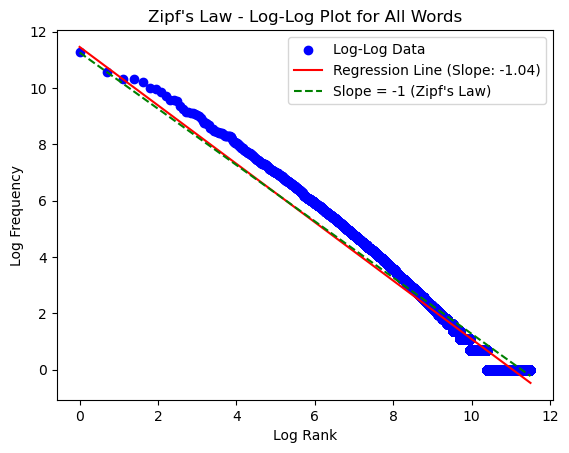

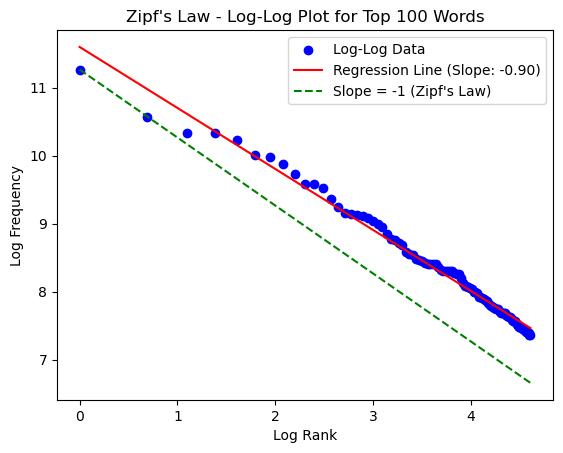

[('the', 78036),
 ('a', 38720),
 ('and', 30863),
 ('to', 30788),
 ('i', 27593),
 ('is', 22176),
 ('of', 21531),
 ('in', 19456),
 ('that', 16776),
 ('for', 14487),
 ('it', 14423),
 ('you', 13698),
 ('with', 11640),
 ('on', 10293),
 ('but', 9443),
 ('not', 9271),
 ('my', 9142),
 ('have', 9050),
 ('are', 8807),
 ('as', 8407),
 ('car', 8047),
 ('be', 7700),
 ('was', 6917),
 ('or', 6445),
 ('they', 6377),
 ('at', 6075),
 ('if', 5901),
 ('this', 5328),
 ('an', 5179),
 ('like', 5111),
 ('more', 4810),
 ('about', 4740),
 ('than', 4697),
 ('would', 4551),
 ('bmw', 4510),
 ('has', 4471),
 ('-', 4450),
 ('just', 4446),
 ('all', 4276),
 ('will', 4105),
 ('one', 4065),
 ('so', 4025),
 ('get', 4022),
 ("it's", 4021),
 ('can', 4017),
 ('your', 3952),
 ('cars', 3869),
 ('what', 3862),
 ('from', 3635),
 ("don't", 3388),
 ('think', 3253),
 ('out', 3240),
 ('me', 3174),
 ('when', 3146),
 ('do', 3124),
 ('had', 2986),
 ('no', 2972),
 ('new', 2946),
 ('tl', 2773),
 ('some', 2764),
 ('up', 2723),
 ('there',

In [139]:
# Importing Data
messagedf = pd.read_csv("messagedata.csv")
messagedf['Message'] = messagedf['Message'].fillna('')

# Counting Number of Words and Sorting
words = ' '.join(messagedf['Message']).lower().split()
word_counts = Counter(words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts_100 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:100]

# All Words

# Finding Ranks and Frequencies
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = np.array([count for word, count in sorted_word_counts])

# Log Transformations
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Econometric Regression
X = sm.add_constant(log_ranks)
model = sm.OLS(log_frequencies, X)
results = model.fit()

# Graphing Results 
zipf_line = log_frequencies[0] + (-1) * (log_ranks - log_ranks[0])

plt.scatter(log_ranks, log_frequencies, color='blue', label='Log-Log Data')
plt.plot(log_ranks, results.predict(X), color='red', label=f'Regression Line (Slope: {results.params[1]:.2f})')
plt.plot(log_ranks, zipf_line, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for All Words')
plt.legend()
plt.show()

# Top 100

# Finding Ranks and Frequencies
ranks_100 = np.arange(1, len(sorted_word_counts_100) + 1)
frequencies_100 = np.array([count for word, count in sorted_word_counts_100])

# Log Transformations
log_ranks_100 = np.log(ranks_100)
log_frequencies_100 = np.log(frequencies_100)

# Econometric Regression
X_100 = sm.add_constant(log_ranks_100)
model_100 = sm.OLS(log_frequencies_100, X_100)
results_100 = model_100.fit()

# Graphing Results 
zipf_line_100 = log_frequencies_100[0] + (-1) * (log_ranks_100 - log_ranks_100[0])

plt.scatter(log_ranks_100, log_frequencies_100, color='blue', label='Log-Log Data')
plt.plot(log_ranks_100, results_100.predict(X_100), color='red', label=f'Regression Line (Slope: {results_100.params[1]:.2f})')
plt.plot(log_ranks_100, zipf_line_100, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for Top 100 Words')
plt.legend()
plt.show()

## Task B

In [21]:
# ChatGPT Support
# Set up ChromeDriver path
driver_path = "/Users/ramzikattan/Downloads/chromedriver-mac-arm64/chromedriver"
chrome_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"

# Configure Chrome options
chrome_options = Options()
chrome_options.binary_location = chrome_path

# Set up the Chrome WebDriver service
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the webpage
carurl = "https://www.kbb.com/car-make-model-list/used/view-all/make/"
driver.get(carurl)
time.sleep(5)  # Wait for the page to load

# Parse the page with BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Close the browser after fetching the page
driver.quit()

# Find all table rows
rows = soup.find_all("tr")
print(f"Number of rows fetched: {len(rows)}")

make_model_data = []

# Loop through each row and extract make, model, and years
for row in rows:
    tds = row.find_all("td", class_="css-irk93x ee33uo33")
    
    # Check if the expected number of <td> elements exist
    if len(tds) >= 3:
        try:
            # Extract model from the second <td>
            model_td = tds[0]
            model = model_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Extract make from the third <td>
            make_td = tds[1]
            make = make_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Append the extracted data
            make_model_data.append({
                "make": make,
                "model": model,
            })
        except Exception as e:
            print(f"Error parsing row: {e}")

makemodeldf = pd.DataFrame(make_model_data)
makemodeldf.to_csv("make_model_data.csv")

Number of rows fetched: 1417


In [153]:
# Merging the two dataframes to account for most car brands
makemodeldf['make'] = makemodeldf['make'].str.lower()
makemodeldf['model'] = makemodeldf['model'].str.lower()
print(len(makemodeldf))

makemodeldf2 = pd.read_csv("Replacement_words.csv")
makemodeldf2.rename(columns={'Brand': 'make'}, inplace=True)
makemodeldf2.rename(columns={'Model': 'model'}, inplace=True)
makemodeldf2['make'] = makemodeldf2['make'].str.lower()
makemodeldf2['model'] = makemodeldf2['model'].str.lower()
print(len(makemodeldf2))

# Save to CSV
mergedmakemodel = pd.concat([makemodeldf, makemodeldf2], ignore_index=True)
mergedmakemodel = mergedmakemodel.drop_duplicates()
mergedmakemodel.to_csv("merged.csv")
print(len(mergedmakemodel))

1416
539
1730


In [223]:
stop_words = set(stopwords.words('english'))
model_to_brand = dict(zip(mergedmakemodel['model'].str.lower(), mergedmakemodel['make'].str.lower()))
brands_set = set(model_to_brand.values())

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]

    # Create a new message with replaced words
    new_message = ' '.join(replaced_words)

    # Filter the replaced words for the list
    filtered_brands = set([word for word in replaced_words if word not in stop_words and word in brands_set])

    return filtered_brands, new_message 

messages = messagedf['Message']
brand_counter = Counter()

for message in messages:
    brands, new_message = replacements(message, model_to_brand, brands_set)
    brand_counter.update(brands)

brands_to_remove = ['car', 'sedan', 'problem', 'seat', 'mini']

for brand in brands_to_remove:
    brand_counter.pop(brand, None)

top_10 = brand_counter.most_common(10)

print("Top 10 Brands by Frequency:")
for brand, count in top_10:
    print(f"{brand.capitalize()}: {count}")


Top 10 Brands by Frequency:
Infiniti: 11162
Lexus: 9380
Bmw: 5111
Acura: 3232
Polestar: 2365
Audi: 2234
Honda: 1691
Cadillac: 1319
Toyota: 1000
Nissan: 835


## Task C

In [238]:
import itertools
import pandas as pd
from collections import Counter
import re

top_10_brands = [brand for brand, count in top_10]

def find_co_occurrences(message, top_10_brands, distance=7):
    words = message.split()
    found_brands = []
    
    for i, word in enumerate(words):
        if word in top_10_brands:
            found_brands.append((word, i)) 
    
    co_occurrences = set()
    for (brand1, idx1), (brand2, idx2) in itertools.combinations(found_brands, 2):
        if abs(idx1 - idx2) <= distance:  # Check distance in terms of word indices
            co_occurrences.add(tuple(sorted((brand1, brand2))))  # Use sorted tuple for co-occurrence
    
    return co_occurrences

brand_counter = Counter()
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Now find co-occurrences using the replaced message
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, distance=7)
    co_occurrence_counter.update(co_occurrences)

def calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand1] / total_messages 
    P_B = brand_counter[brand2] / total_messages  
    
    # Combine counts for both (brand1, brand2) and (brand2, brand1)
    P_AB = (co_occurrence_counter[(brand1, brand2)] + co_occurrence_counter[(brand2, brand1)]) / total_messages if (brand1, brand2) in co_occurrence_counter or (brand2, brand1) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

lift_results = []
for (brand1, brand2) in itertools.combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages)
    lift_results.append((brand1, brand2, lift))

lift_df = pd.DataFrame(lift_results, columns=['Brand1', 'Brand2', 'Lift'])
lift_df.sort_values(by='Lift', ascending=False, inplace=True)

lift_matrix = lift_df.pivot(index='Brand1', columns='Brand2', values='Lift')
lift_matrix = lift_matrix.combine_first(lift_matrix.T)
lift_matrix.fillna(0, inplace=True)

lift_df.to_csv('brand_lift_ratios.csv', index=False)
print(lift_matrix)

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]

    # Create a new message with replaced words
    new_message = ' '.join(replaced_words)

    # Filter the replaced words for the list
    filtered_brands = set([word for word in replaced_words if word not in stop_words and word in brands_set])

    return filtered_brands, new_message


             acura      audi       bmw  cadillac     honda  infiniti     lexus    nissan  polestar    toyota
acura     0.000000  0.646139  0.405021  0.531350  0.924986  0.762201  0.723920  0.411334  0.396432  0.278484
audi      0.646139  0.000000  0.651648  0.656723  0.266053  0.627450  0.558379  0.201044  0.908565  0.201446
bmw       0.405021  0.651648  0.000000  0.502896  0.210018  0.658951  0.621115  0.189811  0.415746  0.264154
cadillac  0.531350  0.656723  0.502896  0.000000  0.147963  0.660250  0.643824  0.108963  0.341431  0.102357
honda     0.924986  0.266053  0.210018  0.147963  0.000000  0.510234  0.428422  1.051781  0.277573  1.960509
infiniti  0.762201  0.627450  0.658951  0.660250  0.510234  0.000000  0.634572  0.664725  0.483021  0.419308
lexus     0.723920  0.558379  0.621115  0.643824  0.428422  0.634572  0.000000  0.482649  0.392206  0.514960
nissan    0.411334  0.201044  0.189811  0.108963  1.051781  0.664725  0.482649  0.000000  0.189908  1.688735
polestar  0.396432 

## Task D

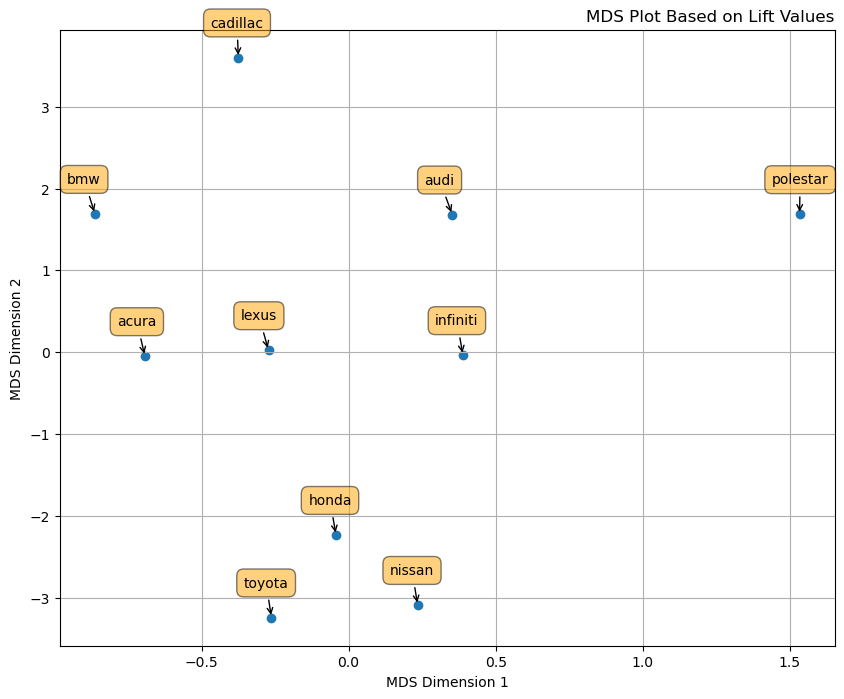

In [239]:
dissimilarity_matrix = 1 / (lift_matrix + 1e-10)
np.fill_diagonal(dissimilarity_matrix.values, 0)  # Set diagonal to zero

# Multidimensional Scaling (MDS)
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   random_state=seed, dissimilarity="precomputed")

try:
    results = mds.fit(dissimilarity_matrix)
    coords = results.embedding_
    
except ValueError as e:
    print(f"Error during MDS fitting: {e}")
    coords = np.zeros((len(lift_matrix), 2))  # Placeholder in case of error

# Plotting the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], marker='o')

# Annotate each point with the corresponding brand name
for label, x, y in zip(lift_matrix.index, coords[:, 0], coords[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='left', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Left-align the title
plt.title('MDS Plot Based on Lift Values', loc='right')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

## Task E

There are several insights which would interest JD Power and Associates based on the results found in task C and D. The most obvious relationship here is that Toyota, Honda, and Nissan are clustered together on the graph. These brands also all represent the only brands with lift values greater than 1 according to the lift matrix. This means that customers view each of these brands very similarly within the entry level luxury car market. The rest of the MDS plot is slightly more complicated. One way to view this plot is to cluster Cadillac, BMW, Audi, Acura, Lexus, and Infiniti altogether. This group represents the higher-end entry level luxury cars within the market. BMW is closest to Acura, while Audi is closest to Infiniti, and Lexus is more or less the central brand. This means that when consumers think of a high-end entry level luxury car, they are thinking of or comparing what they have to the Lexus. Lastly, off to the right we see the Polestar singled out on its own. Since Polestar is most known for producing electric cars, there is an obvious separation between this brand and the rest. If more entry level electric cars were mentioned in the data, it is most likely that they would form a cluster near Polestar and represent the electric car cluster of entry-level luxury brands. 

## Task F

In [21]:
# Creating a DataFrame from the list of tuples
sorteddf = pd.DataFrame(sorted_word_counts, columns=['Word', 'Frequency'])


In [22]:
# Save the DataFrame as a CSV file
sorteddf.to_csv('word_frequenciesF.csv', index=False)

print('Looked for top car related words: drive, performance, luxury, price, manual, engine, sport, interior, rwd, awd, feel')

Looked for top car related words: drive, performance, luxury, price, manual, engine, sport, interior, rwd, awd, feel


In [236]:
import itertools
import pandas as pd
from collections import Counter
import re

top_10_brands = [brand for brand, count in top_10]
attributes = ['performance', 'luxury', 'interior', 'rwd', 'awd', 'power', 'cost', 'hp', 'handling']

def find_co_occurrences(message, top_10_brands, attributes):
    words = message.split()
    found_brands = []
    found_attributes = []

    for word in words:
        if word in top_10_brands:
            found_brands.append(word)
        if word in attributes:
            found_attributes.append(word)
    
    co_occurrences = set()
    for brand in found_brands:
        for attribute in found_attributes:
            co_occurrences.add((brand, attribute))  # No distance check, just record co-occurrences
    
    return co_occurrences

brand_counter = Counter()
attribute_counter = Counter()  # Counter for attributes
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Count attributes in the message
    for word in replaced_message.split():
        if word in attributes:
            attribute_counter[word] += 1
    
    # Find co-occurrences with attributes
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, attributes)
    co_occurrence_counter.update(co_occurrences)

def calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand] / total_messages 
    P_B = attribute_counter[attribute] / total_messages if attribute in attribute_counter else 0
    P_AB = co_occurrence_counter[(brand, attribute)] / total_messages if (brand, attribute) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

# Create a DataFrame for lifts
lift_results = []

for brand in top_10_brands:
    for attribute in attributes:
        lift = calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages)
        lift_results.append((brand, attribute, lift))

# Create a DataFrame with brands as rows and attributes as columns
lift_df = pd.DataFrame(lift_results, columns=['Brand', 'Attribute', 'Lift'])

# Pivot the DataFrame to have brands in rows and attributes in columns
final_lift_matrix = lift_df.pivot(index='Brand', columns='Attribute', values='Lift')

# Fill any NaN values with 0
final_lift_matrix.fillna(0, inplace=True)

# Save to CSV if needed
final_lift_matrix.to_csv('brand_attribute_lift_ratios.csv', index=True)

# Print the final lift matrix
print(final_lift_matrix)

Attribute       awd      cost  handling        hp  interior    luxury  performance     power       rwd
Brand                                                                                                 
acura      1.211531  0.953100  1.358458  1.031422  1.149388  1.050638     1.068455  1.234257  1.127784
audi       1.310514  1.292701  1.406224  1.128097  1.345691  1.050859     1.099397  1.518328  0.907548
bmw        0.659719  1.308997  1.266339  1.095749  0.918934  0.899515     1.064660  1.152051  0.752186
cadillac   0.597856  1.204201  1.272170  1.061481  1.573190  1.186565     1.092033  1.032264  0.739162
honda      0.921949  1.176486  1.454887  1.088186  1.209149  1.264346     1.157572  1.454970  1.048282
infiniti   0.675622  0.879666  0.932503  0.766939  0.826130  0.734876     0.812317  0.911650  0.730529
lexus      0.748895  1.007444  1.055857  0.874259  0.897827  0.879701     0.932515  1.024999  0.832699
nissan     0.868412  1.152852  1.178546  1.229623  0.969785  1.029217    

In [29]:
import pandas as pd

# Input the lift matrix
data = {
    'Brand': ['acura', 'audi', 'bmw', 'cadillac', 'honda', 'infiniti', 'lexus', 'nissan', 'polestar', 'toyota'],
    'awd': [1.211531, 1.310514, 0.659719, 0.597856, 0.921949, 0.675622, 0.748895, 0.868412, 1.042461, 0.652611],
    'cost': [0.953100, 1.292701, 1.308997, 1.204201, 1.176486, 0.879666, 1.007444, 1.152852, 1.689183, 1.363727],
    'handling': [1.358458, 1.406224, 1.266339, 1.272170, 1.454887, 0.932503, 1.055857, 1.178546, 1.168292, 1.690609],
    'hp': [1.031422, 1.128097, 1.095749, 1.061481, 1.088186, 0.766939, 0.874259, 1.229623, 1.336241, 0.693380],
    'interior': [1.149388, 1.345691, 0.918934, 1.573190, 1.209149, 0.826130, 0.897827, 0.969785, 1.074273, 1.103312],
    'luxury': [1.050638, 1.050859, 0.899515, 1.186565, 1.264346, 0.734876, 0.879701, 1.029217, 0.847889, 1.669883],
    'performance': [1.068455, 1.099397, 1.064660, 1.092033, 1.157572, 0.812317, 0.932515, 1.046807, 1.087952, 1.218793],
    'power': [1.234257, 1.518328, 1.152051, 1.032264, 1.454970, 0.911650, 1.024999, 1.516177, 1.595830, 1.027139],
    'rwd': [1.127784, 0.907548, 0.752186, 0.739162, 1.048282, 0.730529, 0.832699, 1.141073, 1.072768, 0.930638]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df.set_index('Brand', inplace=True)

# Sorting each column (attribute) by the values in descending order and placing the brand names accordingly
ranked_df = pd.DataFrame({col: df[col].sort_values(ascending=False).index for col in df.columns})

# Print the ranked DataFrame
ranked_df.head(10)

,awd,cost,handling,hp,interior,luxury,performance,power,rwd
0,audi,polestar,toyota,polestar,cadillac,toyota,toyota,polestar,nissan
1,acura,toyota,honda,nissan,audi,honda,honda,audi,acura
2,polestar,bmw,audi,audi,honda,cadillac,audi,nissan,polestar
3,honda,audi,acura,bmw,acura,audi,cadillac,honda,honda
4,nissan,cadillac,cadillac,honda,toyota,acura,polestar,acura,toyota
5,lexus,honda,bmw,cadillac,polestar,nissan,acura,bmw,audi
6,infiniti,nissan,nissan,acura,nissan,bmw,bmw,cadillac,lexus
7,bmw,lexus,polestar,lexus,bmw,lexus,nissan,toyota,bmw
8,toyota,acura,lexus,infiniti,lexus,polestar,lexus,lexus,cadillac
9,cadillac,infiniti,infiniti,toyota,infiniti,infiniti,infiniti,infiniti,infiniti


# Task G

# Task H

In [31]:
import re
from collections import Counter
import pandas as pd

# List of aspirational phrases that indicate people are aspiring to have a brand
aspirational_phrases = [
    'i want this car', 'love', 'forever car', 'wish i had', 'dream car', 'desire', 'my favorite'
]

# Preprocessing the aspirational phrases to make them more flexible for matching
aspirational_phrases_regex = [re.escape(phrase) for phrase in aspirational_phrases]


# Function to extract both brands and attributes from a message
def extract_brands(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]
    
    brands_in_message = set([word for word in replaced_words if word in brands_set])
    
    return brands_in_message

# Function to check if a message contains any aspirational phrases
def contains_aspirational_phrase(message, aspirational_phrases_regex):
    message = message.lower()
    return any(re.search(phrase, message) for phrase in aspirational_phrases_regex)

# Initialize counter for brand-aspiration associations
aspirational_brand_counter = Counter()

# Process each message in the dataset
for message in messagedf['Message']:
    if contains_aspirational_phrase(message, aspirational_phrases_regex):
        # Extract brands in the message
        brands_in_message, _ = extract_brands(message, model_to_brand, brands_set)
        # Update brand aspirational counter
        aspirational_brand_counter.update(brands_in_message)

# Rank the brands based on their association with aspirational phrases
top_aspirational_brands = aspirational_brand_counter.most_common()

# Display the results
print("Top Brands People Aspire to Have:")
for brand, count in top_aspirational_brands:
    print(f"{brand.capitalize()}: {count} mentions")

# Save the results to a CSV file
aspirational_df = pd.DataFrame(top_aspirational_brands, columns=['Brand', 'Mentions'])
aspirational_df.to_csv('aspirational_brands.csv', index=False)


NameError: name 'model_to_brand' is not defined